In [1]:
from ecotools.pi_client import pi_client
pi = pi_client(username = r'ad3\sbharadw')

ad3\sbharadw, please provide your password (text will be hidden) 
>>········
save password? [y/n] /n after saving, set username = 'file' to use this feature 
>>y


In [2]:
tag = pi.search_by_point(['aiTIT4045'])
data = pi.get_stream_by_point(tag, start='2021-01-01', end='2021-02-01', interval='1h', calculation='summary')

21:58:07: Sending API request... Chunk 1 of 1
21:58:07: Response recieved for 1 tags! (0.22)


In [3]:
tag = pi.search_by_point(['AP.CHEM_Total_Count'])
data = pi.get_stream_by_point(tag, start='2021-01-01', end='2021-02-01', interval='1h', calculation='summary')

21:58:08: Sending API request... Chunk 1 of 1
21:58:08: Response recieved for 1 tags! (0.25)


In [4]:
import sys
print(sys.path)

['/Users/sanab/Desktop/eco-tools/notebooks/mnv', '/Users/sanab/opt/anaconda3/lib/python38.zip', '/Users/sanab/opt/anaconda3/lib/python3.8', '/Users/sanab/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/sanab/.local/lib/python3.8/site-packages', '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages', '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/sanab/.ipython']


### Local Data Loading

In [5]:
# file_path = 'data/pes kbtu.xlsx'
# data = pd.read_excel(file_path, header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
# print(data.columns)

### PI Data Loading

In [6]:
# pi = pi_client(username=r'ad3\sbharadw')
tags = pi.search_by_point(['*ghau*flex**'])

tags

['Ghausi_Hall_Flexim/Chilled_Water',
 'Ghausi_Hall_Flexim/Chilled_Water_Demand',
 'Ghausi_Hall_Flexim/Chilled_Water_Return_Temp',
 'Ghausi_Hall_Flexim/Chilled_Water_Supply_Temp',
 'Ghausi_Hall_Flexim/Chilled_Water_Volumetric_Flow',
 'Ghausi_Hall_Flexim/Chilled_Water_Volumetric_Positive_Totalizer',
 'Ghausi_Hall_Flexim_Chilled_Water_Usage']

In [7]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from ecotools.pi_client import pi_client
from ecotools import mnv

print(mnv.version)  # Last updated for mnv v2.0.1

ad3\sbharadw, please provide your password (text will be hidden) 
>>········
save password? [y/n] /n after saving, set username = 'file' to use this feature 
>>y
Version 2.0.1


In [8]:
tags = ['Chemistry_ChilledWater_Demand_kBtu', 'AP.CHEM_Total_Count']

#### Pull tags

In [9]:
start = '2018-03-10'
end = '2019-03-10'
interval = '1h' # Can be "min" "h" "d"
calculation = 'summary'
weight = 'TimeWeighted'

data = pi.get_stream_by_point(tags, start=start, end=end, interval=interval, calculation=calculation, _weight=weight)

print(data.head())

21:58:29: Sending API request... Chunk 1 of 1
21:58:30: Response recieved for 2 tags! (0.89)
                     Chemistry_ChilledWater_Demand_kBtu  AP.CHEM_Total_Count
Timestamp                                                                   
2018-03-10 00:00:00                          410.000000                  NaN
2018-03-10 01:00:00                          410.000000                  NaN
2018-03-10 02:00:00                          410.000000                  NaN
2018-03-10 03:00:00                          347.836938                  NaN
2018-03-10 04:00:00                           25.000000                  NaN


In [10]:
data.rename(columns={'AP.CHEM_Total_Count':'wifi'}, inplace=True)

# Data Section

In [11]:
# dataParams [do not edit line]
dataParams = {'column': 0,
              'IQRmult' : 3.0,
              'IQR' : False,
              'floor': -1,
              'ceiling': 40000000,
              'resample_rate' : 'D', #'D' for daily 'H' for hourly
              'oat_source' : 'pi', #'self' or 'file' or 'pi'
              'oat_name' : 'aiTIT4045', #Name of OAT column if OATsource is 'self'
              'slice_type' : 'ranges', #half, middate, ranges
              'mid_date' : '2017-01-01', #only needed with sliceType : 'middate'
              'date_ranges' : ['2017-10-29', '2018-10-29', '2018-10-30', '2021-04-01'], #only needed with sliceType : 'ranges'
             }

### Data Cleaning

"0 days 01:00:00" is 60.0 min
21:58:30: Sending API request... Chunk 1 of 1
21:58:31: Response recieved for 1 tags! (0.51)



/Users/sanab/.local/lib/python3.8/site-packages/ecotools/ecotools/_ecotools.py:544: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.week


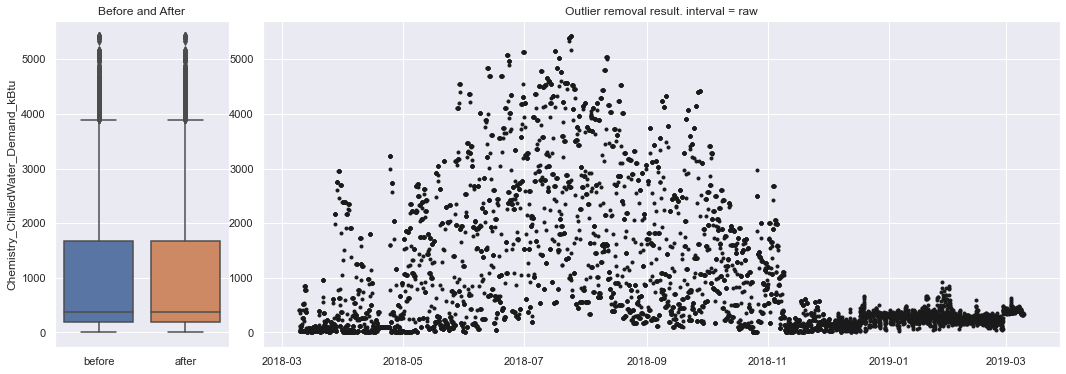

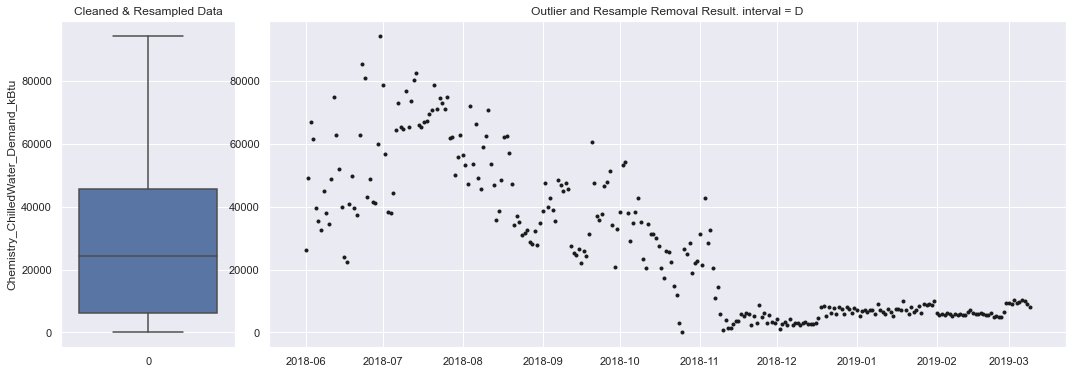

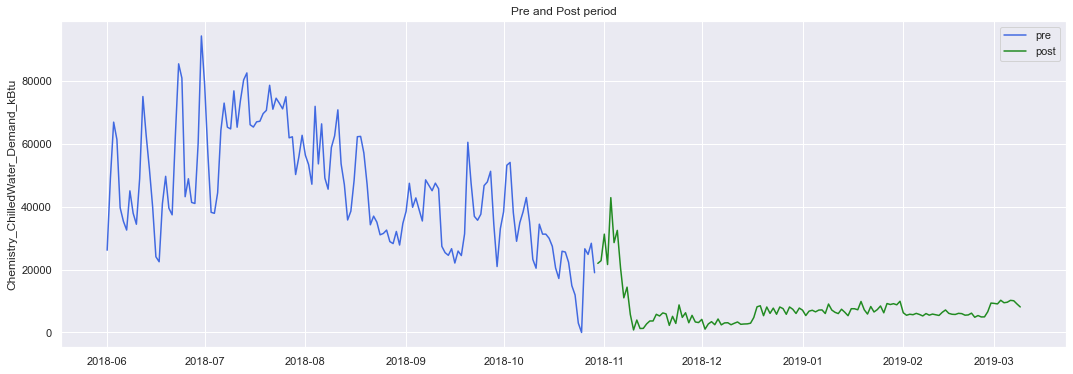

In [12]:
dk = mnv.data_keeper(data, dataParams)
dk.default_clean()

# Plots
dk.outlier_plot()
dk.resampled_plot()
dk.pre_post_plot()

# Modeling Section

In [13]:
# modelParams [do not edit line]
modelParams = {'var': ['CDH', 'HDH', 'C(weekday)'],
               'train_test_split': 'random',
               'random_state': 4291990,  #Good idea to use a seed value so folds consitent between runs
               'test_size': 0.20,
               'var_combinations': [['', 'CDH', 'CDH2'], ['', 'HDH', 'HDH2'], '', 'C(weekday)',['wifi']]
              }

In [14]:
dk.pre 

,Chemistry_ChilledWater_Demand_kBtu,wifi,HDH,CDH,HDH2,CDH2,year,month,dayofmonth,hour,minute,dayofweek,weekofyear,daytime,weekday,saturday,sunday
Timestamp,,,,,,,,,,,,,,,,,
2018-06-01,26134.068661,3602.423116,0.000000,186.478007,0.000000,3093.801144,2018,6,1,0,0,4,22,0,1,0,0
2018-06-02,49011.175151,1588.307034,19.061559,349.587120,106.217563,8547.771699,2018,6,2,0,0,5,22,0,0,1,0
2018-06-03,66818.854453,5162.062800,0.949244,420.885242,0.563200,10967.828399,2018,6,3,0,0,6,22,0,0,0,1
2018-06-04,61313.143733,9593.186887,6.603912,306.190213,14.257431,6692.905674,2018,6,4,0,0,0,23,0,1,0,0
2018-06-05,39625.721660,10614.382929,42.122170,173.659832,274.152585,2885.725738,2018,6,5,0,0,1,23,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-25,0.000000,5828.660508,74.302617,128.842500,536.157957,1865.132311,2018,10,25,0,0,3,43,0,1,0,0
2018-10-26,26582.974831,7872.000000,82.105878,112.052726,695.541976,1313.491903,2018,10,26,0,0,4,43,0,1,0,0
2018-10-27,24794.496048,7872.000000,61.767603,109.937514,426.179244,1389.599898,2018,10,27,0,0,5,43,0,0,1,0


### Many Linear Models

Entering run_all_linear()...

... run_all_linear() complete
       AIC       AR2        R2    cvrmse    post_diff  \
6   2454.1  0.780175  0.885761  0.134816 -5.03274e+06   
7   2455.7  0.779377  0.886149  0.134586 -5.11711e+06   
0  2458.89  0.780836  0.886126    0.1346 -4.86585e+06   
1  2460.59  0.779681  0.886316  0.134487 -4.94355e+06   
2  2468.25  0.763483  0.876478  0.140186 -7.05445e+06   

                              var  
6               CDH2 + HDH + wifi  
7  CDH2 + HDH + wifi + C(weekday)  
0                CDH + HDH + wifi  
1   CDH + HDH + wifi + C(weekday)  
2               CDH + HDH2 + wifi  


/Users/sanab/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


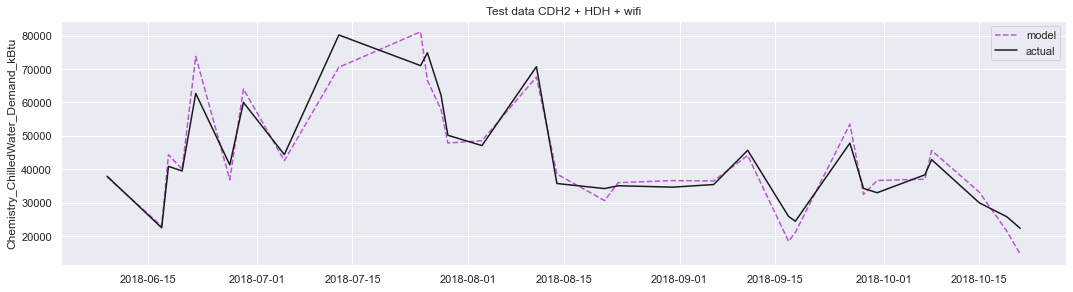

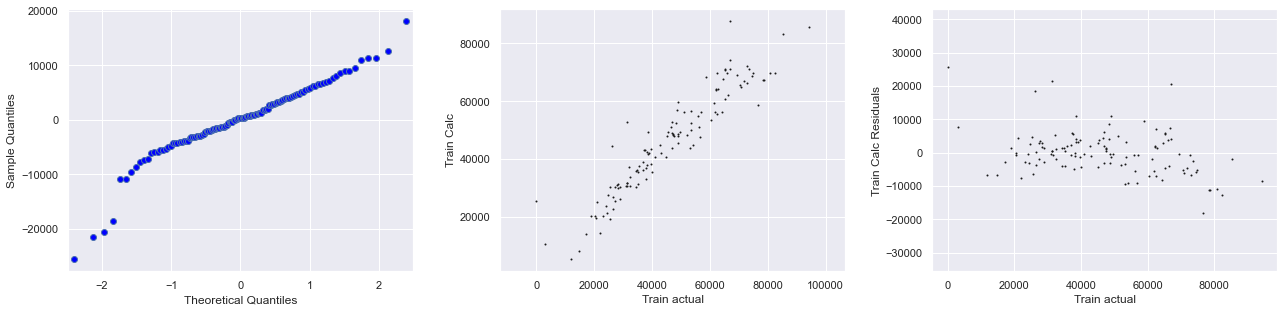

/Users/sanab/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


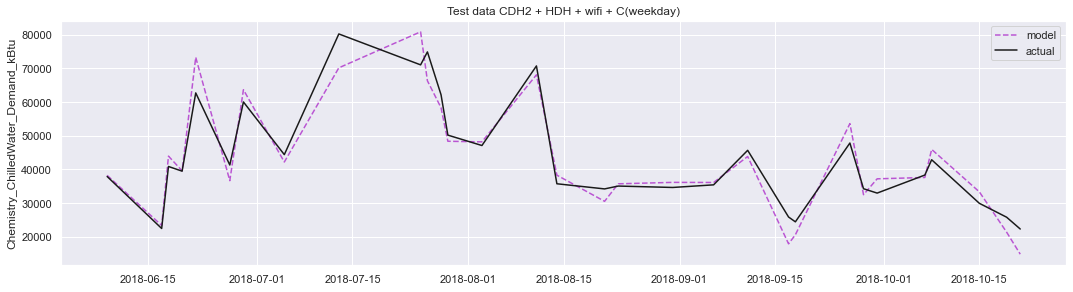

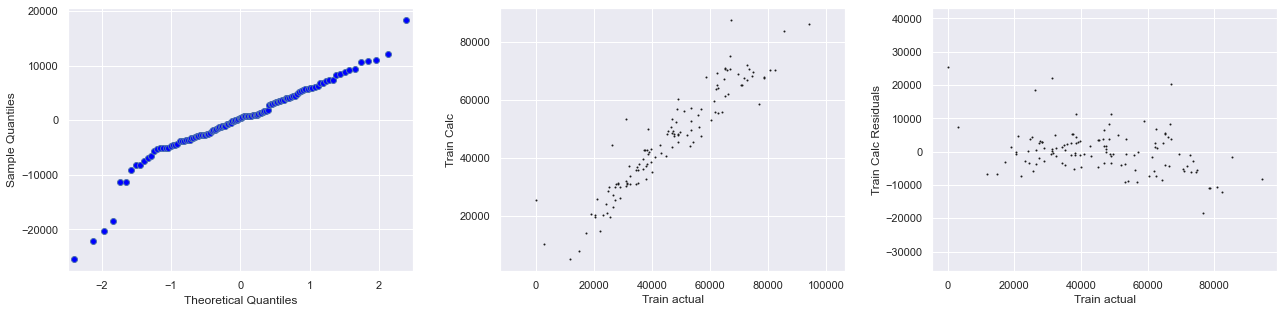

In [15]:
# Run All Linear [do not edit line]
allmod = mnv.many_ols(dk.pre, dk.post, modelParams)
allmod.run_all_linear()

print(allmod.stats_pool[0:5])  # Display top stats
allmod.plot_pool(2)  # Visualize top models
# Set the modelParam "var" to the 'best' model from run_all_linear()
modelParams['var'] = allmod.stats_pool.iloc[0]['var']

### Single Linear Model

             VIF
const  13.324447

Kfold
        AR2           mse  pct. of mean
1  0.895024  3.068897e+07     79.157894
4  0.883677  3.830350e+07     98.798509
3  0.881327  4.081842e+07    105.285391
2  0.882976  4.088555e+07    105.458565
0  0.878663  4.315010e+07    111.299646


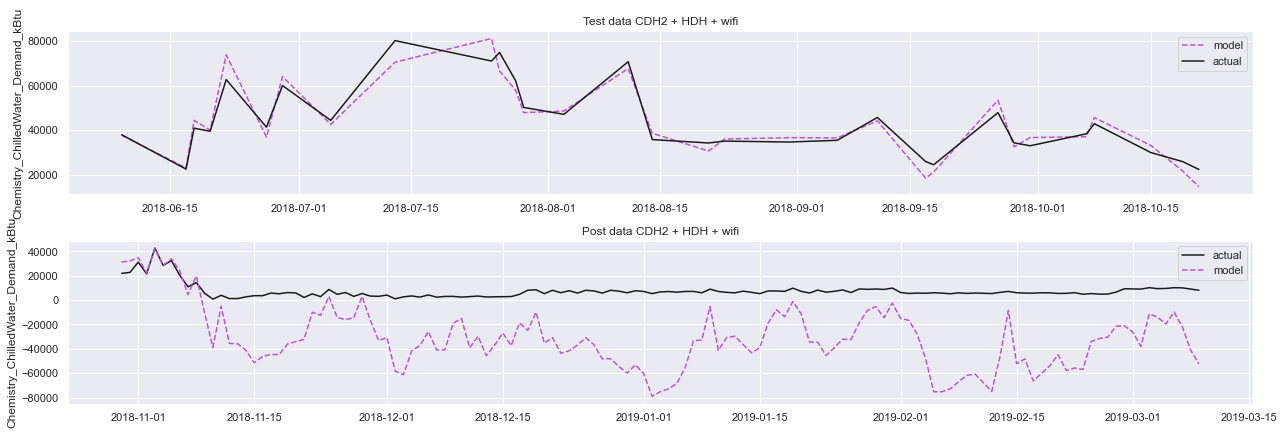

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Chemistry_ChilledWater_Demand_kBtu   R-squared:                       0.882
Model:                                            OLS   Adj. R-squared:                  0.879
Method:                                 Least Squares   F-statistic:                     288.2
Date:                                Thu, 04 Nov 2021   Prob (F-statistic):           1.38e-53
Time:                                        21:58:39   Log-Likelihood:                -1223.1
No. Observations:                                 120   AIC:                             2454.
Df Residuals:                                     116   BIC:                             2465.
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.156e+04   2269.031     13.909      0.000    2.71e+04    3.61e+04
CDH2           3.6940      0.242     15.295      0.000       3.216       4.172
HDH         -209.1911     24.317     -8.603      0.000    -257.353    -161.029
wifi           0.4597      0.281      1.633      0.105      -0.098       1.017
==============================================================================
Omnibus:                       27.385   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.732
Skew:                          -0.905   Prob(JB):                     1.07e-13
Kurtosis:                       5.944   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
modelParams['commodity_rate'] = (0.053/12)

mod = mnv.ols_model(dk.pre, dk.post, modelParams)
mod.calculate_kfold()
mod.calculate_vif()

print(mod.vif[mod.vif['VIF'] > 5])

print('\nKfold')
print(mod.kfold_stats)

mod.model_plot()
plt.show() # Show plot before Stats summary
mod.Fit.summary()

# Savings

          Energy Savings Dollar Savings       Start         End
Actual      -5.03274e+06         -22228  2018-10-30  2019-03-09
Predicted   -4.49518e+06       -19853.7  2018-06-01  2018-10-29


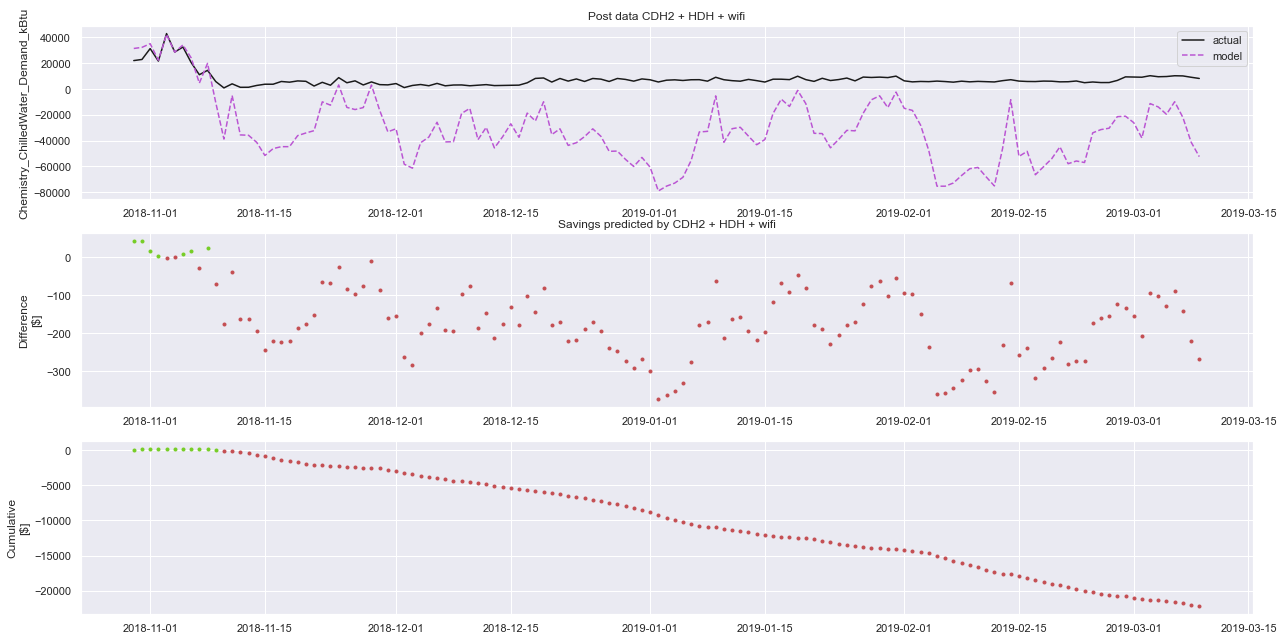

In [18]:
mod.generate_savings_summary(prediction='pre')
print(mod.savings_summary)

mod.savings_plot(yaxis='dollars')
mod.calculate_F_uncertainty()

<AxesSubplot:xlabel='Timestamp'>

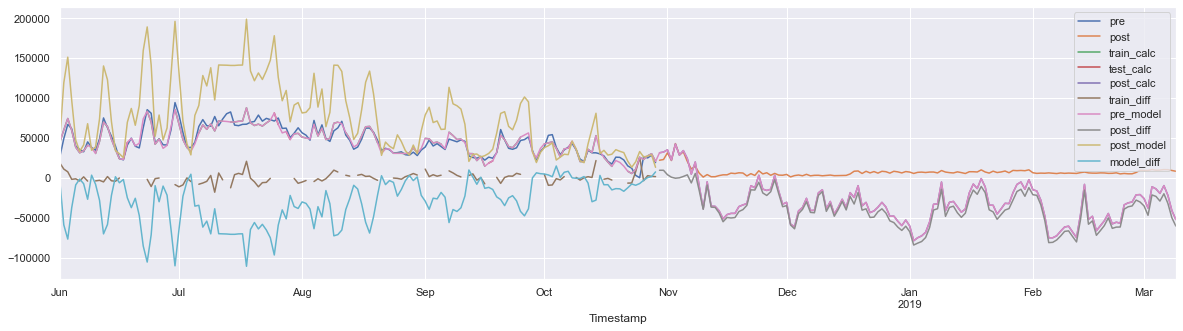

In [19]:
mod.data.plot(figsize=(20,5))

### Creating an Archive

#### Make sure to save (Ctrl + S !) before running this cell !

In [18]:
# Create Archive [do not edit line]
## Only run this section when you're confident in the model and wish to save it
import nbformat
from ecotools.mnv.archive import airtable_archive, remove_nb_outputs

notebook_data = nbformat.read(fp="MnV Tool.ipynb", as_version=4)

remove_nb_outputs(notebook_data)
airtable_archive(dk, mod, notebook=notebook_data, airtable_data={})